## Loading Data Set

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as yf



data=pd.read_csv('./airbnb.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            14456 non-null  int64  
 1   name          14455 non-null  object 
 2   rating        14456 non-null  object 
 3   reviews       11712 non-null  object 
 4   host_name     14455 non-null  object 
 5   host_id       14017 non-null  float64
 6   address       14429 non-null  object 
 7   features      14429 non-null  object 
 8   amenities     13467 non-null  object 
 9   safety_rules  14247 non-null  object 
 10  hourse_rules  14247 non-null  object 
 11  img_links     14429 non-null  object 
 12  price         14456 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.4+ MB


## Removing Duplicates

In [11]:
data.duplicated(subset=['id']).sum()
#732 records are duplicates 
data[data.duplicated(subset=['id'])]['address'].value_counts()
data.drop_duplicates(subset=['id'],inplace=True)

np.int64(0)

# #There one record with no name and host_name we can drop it

In [14]:
data.isnull().sum()
#There one record with no name and host_name we can drop it

id                 0
name               0
rating             0
reviews         2641
host_name          0
host_id          376
address           25
features          25
amenities        918
safety_rules     199
hourse_rules     199
img_links         25
price              0
dtype: int64

There one record with no name and host_name we can drop it

In [ ]:
# data.dropna(subset=['name'],inplace=True)
data.isnull().sum()

# We have airbnbs with no address, and host_id we can drop them as it won't help us in our Data Analysis

In [17]:
data.dropna(subset=['address','host_id'],inplace=True)
data.isnull().sum()

id                 0
name               0
rating             0
reviews         2434
host_name          0
host_id            0
address            0
features           0
amenities        542
safety_rules     174
hourse_rules     174
img_links          0
price              0
dtype: int64

# We know every airbnb has some basic  amenities like wifi,tv,Parking

In [19]:
data['amenities'].fillna('Wifi,Tv,Parking',inplace=True)
data.isnull().sum()

C:\Users\vipul\AppData\Local\Temp\ipykernel_36724\2489310843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['amenities'].fillna('Wifi,Tv,Parking',inplace=True)


id                 0
name               0
rating             0
reviews         2434
host_name          0
host_id            0
address            0
features           0
amenities          0
safety_rules     174
hourse_rules     174
img_links          0
price              0
dtype: int64

# We can Replace null with most common safety_rules,hourse_rules 

In [20]:
data['hourse_rules'].fillna(data['hourse_rules'].mode()[0],inplace=True)
data['safety_rules'].fillna(data['safety_rules'].mode()[0],inplace=True)
data.isnull().sum()

C:\Users\vipul\AppData\Local\Temp\ipykernel_36724\4293043800.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['hourse_rules'].fillna(data['hourse_rules'].mode()[0],inplace=True)
C:\Users\vipul\AppData\Local\Temp\ipykernel_36724\4293043800.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

id                 0
name               0
rating             0
reviews         2434
host_name          0
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
dtype: int64

## Since there are property which are new for them we can saying the review are 0 and rest can be drop as we don't know no of people who have reviewed or not

In [26]:
data[data['rating']=='New']['reviews'].fillna('0',inplace=True)
data.isnull().sum()

data.dropna(subset=['reviews'],inplace=True)
data.isnull().sum()

id              0
name            0
rating          0
reviews         0
host_name       0
host_id         0
address         0
features        0
amenities       0
safety_rules    0
hourse_rules    0
img_links       0
price           0
dtype: int64

# Column wise data Cleaning

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10913 entries, 0 to 14455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10913 non-null  int64  
 1   name          10913 non-null  object 
 2   rating        10913 non-null  object 
 3   reviews       10913 non-null  object 
 4   host_name     10913 non-null  object 
 5   host_id       10913 non-null  float64
 6   address       10913 non-null  object 
 7   features      10913 non-null  object 
 8   amenities     10913 non-null  object 
 9   safety_rules  10913 non-null  object 
 10  hourse_rules  10913 non-null  object 
 11  img_links     10913 non-null  object 
 12  price         10913 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


# Should be Numeric Type Columns : [Rating,Reviews,Price]

In [33]:
data['rating'].unique()
Making new value has zero rating
data['rating']=data['rating'].apply(lambda x:x.replace('New','0'))
data['rating'].unique()
Converting datatype to float
data['rating']=data['rating'].astype(np.float64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10913 entries, 0 to 14455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10913 non-null  int64  
 1   name          10913 non-null  object 
 2   rating        10913 non-null  float64
 3   reviews       10913 non-null  object 
 4   host_name     10913 non-null  object 
 5   host_id       10913 non-null  float64
 6   address       10913 non-null  object 
 7   features      10913 non-null  object 
 8   amenities     10913 non-null  object 
 9   safety_rules  10913 non-null  object 
 10  hourse_rules  10913 non-null  object 
 11  img_links     10913 non-null  object 
 12  price         10913 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [37]:
data['reviews'].unique()
converting the string into proper number string format
data['reviews']=data['reviews'].apply(lambda x: x.replace(',',''))
data['reviews'].unique()
data['reviews']=data['reviews'].astype(np.float64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10913 entries, 0 to 14455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10913 non-null  int64  
 1   name          10913 non-null  object 
 2   rating        10913 non-null  float64
 3   reviews       10913 non-null  float64
 4   host_name     10913 non-null  object 
 5   host_id       10913 non-null  float64
 6   address       10913 non-null  object 
 7   features      10913 non-null  object 
 8   amenities     10913 non-null  object 
 9   safety_rules  10913 non-null  object 
 10  hourse_rules  10913 non-null  object 
 11  img_links     10913 non-null  object 
 12  price         10913 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [44]:
extracting price and converting it to integer
Get All digits and append them to get price 
data['price']=data['price'].apply(lambda x:int(''.join([d for d in x if d.isdigit()])))
data['price'].unique()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10913 entries, 0 to 14455
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10913 non-null  int64  
 1   name          10913 non-null  object 
 2   rating        10913 non-null  float64
 3   reviews       10913 non-null  float64
 4   host_name     10913 non-null  object 
 5   host_id       10913 non-null  float64
 6   address       10913 non-null  object 
 7   features      10913 non-null  object 
 8   amenities     10913 non-null  object 
 9   safety_rules  10913 non-null  object 
 10  hourse_rules  10913 non-null  object 
 11  img_links     10913 non-null  object 
 12  price         10913 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


## We need Country and features and basic amenities columns for each Airbnb

In [53]:
data['address'].apply(lambda x : x.split(',')[-1]).str.strip().unique()
we can see that for each address the last value after split is country
data['country']=data['address'].apply(lambda x : x.split(',')[-1]).str.strip()
data.head(10)

In [114]:
def has_bed_in_record(y):
    # print(y)
    container={}
    for t in y.split(','):
        for word in t.split(' '):
            container[word]=container.get(word,0)+1
    # print(container)
    return 'bed' in container or 'beds' in container
f=data['features'].apply(has_bed_in_record)
data[f].index
len(data) Total number of record 10913



convert every string to lower case and then perform the following operations
check guest to number of guest allowed
check bedroom to get number of bedroom allowed
check for bed or beds to get number of beds allowed
check for bathroom or toilet  when toilet then create it as 1 bathroom
guest=[]
bedroom=[]
bathroom=[]
bed=[]
# df=data['features'][0:10]
for row in data['features'].apply(lambda y : y.lower().split(',')):
    a=b=c=d=None
    a,b=row[0],row[1]
    if(len(row)>=3): c=row[2]
    if(len(row)>3): d=row[3]
    # print(a,b,c,d)
    g_add=False
    bed_add=False
    bath_add=False
    bedroom_add=False
    if('guest' in a):
        guest.append(int(float(a.split(' ')[0])))
        g_add=True
    elif('bedroom' in a):
        bedroom.append(int(float(a.split(' ')[0])))
        bedroom_add=True
    elif('bed' in a or 'beds' in a):
        bed.append(int(float(a.split(' ')[0])))
        bed_add=True
    elif('bathroom' in a):
        bathroom.append(int(float(a.split(' ')[0])))
        bath_add=True
    elif('toilet' in a):
        bathroom.append(1)
        bath_add=True

    #check for b 
    if('guest' in b):
        guest.append(int(float(b.split(' ')[0])))
        g_add=True
    elif('bedroom' in b):
        bedroom.append(int(float(b.split(' ')[0])))
        bedroom_add=True
    elif('bed' in b or 'beds' in b):
        bed.append(int(float(b.split(' ')[0])))
        bed_add=True
    elif('bathroom' in b):
        bathroom.append(int(float(b.split(' ')[0])))
        bath_add=True
    elif('toilet' in b):
        bathroom.append(1)
        bath_add=True

    #check for c
    if(c):
        if('guest' in c):
            guest.append(int(float(c.split(' ')[0])))
            g_add=True
        elif('bedroom' in c):
            bedroom.append(int(float(c.split(' ')[0])))
            bedroom_add=True
        elif('bed' in c or 'beds' in c):
            bed.append(int(float(c.split(' ')[0])))
            bed_add=True
        elif('bathroom' in c):
            bathroom.append(int(float(c.split(' ')[0])))
            bath_add=True
        elif('toilet' in c):
            bathroom.append(1)
            bath_add=True

    #check for d
    if(d):
        if('guest' in d):
            guest.append(int(float(d.split(' ')[0])))
            g_add=True
        elif('bedroom' in d):
            bedroom.append(int(float(d.split(' ')[0])))
            bedroom_add=True
        elif('bed' in d or 'beds' in d):
            bed.append(int(float(d.split(' ')[0])))
            bed_add=True
        elif('bathroom' in d):
            bathroom.append(int(float(d.split(' ')[0])))
            bath_add=True
        elif('toilet' in d):
            bathroom.append(1)
            bath_add=True
    if(g_add==False): guest.append(0)
    if(bed_add==False): bed.append(0)
    if(bath_add==False): bathroom.append(0)
    if(bedroom_add==False): bedroom.append(0)
# print(len(guest),len(bed),len(bedroom),len(bathroom))
# print(bed)
data['no_of_guest']=guest
data['no_of_bed']=bed
data['no_of_bedroom']=bedroom
data['no_of_bathroom']=bathroom
data.head(10)
data.info()
cleaned_airbnb=data.to_csv('./cleaned_airbnb.csv')

## Extracted Check_in and Check_out Time to get Additional information of timings based location

In [21]:
data['amenities'].apply(lambda y :y.split(',')).explode().unique()
data.head(10)
data=pd.read_csv('./cleaned_airbnb.csv')
data.head()
check_in=[]
check_out=[]
df=data['hourse_rules'][:10]
for i  in data['hourse_rules'].apply(lambda y:y.lower().strip().split(',')):
    check_in_add=False
    check_out_add=False
    for j in i:
        # print(j)
        if(not check_in_add and 'check-in' in j):
            check_in_add=True
            check_in.append(j.split('check-in')[1])
        if('check out' in j):
            check_out.append(j.split('check out:')[1])
            check_out_add=True
    if(not check_in_add): check_in.append('0:00 AM - 24:00 PM')
    if(not check_out_add): check_out.append('0:00 AM - 24:00 PM')
data['hourse_rules']
# print(len(check_in),len(check_out))
check_in=list(map(lambda y:y[1:].strip(),check_in))
check_out=list(map(lambda y:y[2:] ,check_out))

print(len(check_out),len(check_in))
data.head(10)
print(check_out)
data['check_in_time']=check_in
data['check_out_time']=check_out
data.head()
data.info()

## Extracted Feature for Basic Amenities

In [31]:
data=pd.read_csv('./cleaned_airbnb.csv)
data.head()
data.head(10)
data.info()
has_wifi=[False]*10913
has_tv=[False]*10913
has_view=[False]*10913
ind=0
for row in data['amenities'].apply(lambda y:y.lower().split(',')):
    for entry in row:
        if('wifi' in entry):
            has_wifi[ind]=True
        if('tv' in entry):
            has_tv[ind]=True
        if('view' in entry):
            has_view[ind]=True
    ind+=1
# print(has_view)
data['has_view']=has_view
data['has_tv']=has_tv
data['has_wifi']=has_wifi
data.head()

## Data Analysis for Airbnb Data

In [40]:
Top 10 hosts with highest number of reviews
data=pd.read_csv('./cleaned_airbnb.csv')
df=data.sort_values(by=['reviews'],ascending=False)
df.loc[0:9,['name']]

,name
0,Perla bungalov
9608,"Hanok Stay, Sister House Mordern style Han-ok"
9623,Butterfly Villa
4351,"La Belle Blanche, Yurt in Cévennes"
1377,Geodome Private peaceful Getaway near Lake Travis
...,...
156,Cabana Triangle House Parang
24,"Sapanca Yura Bungalov-1 Havuzlu, Korunaklı,"
10194,Riverside Mansion+lawn Moet's Waterfront Estate
6181,Eolia Gold Villa with Private Heated Pool


### 1.Total number of Airbnb in each Country

In [42]:
data['country'].value_counts()

country
India         2096
Italy          983
Greece         866
Thailand       540
France         451
              ... 
Argentina        1
Jamaica          1
Guatemala        1
Senegal          1
Bangladesh       1
Name: count, Length: 114, dtype: int64

### Average Rating of properties based on Country

In [50]:
data.groupby(by=['country'])['rating'].agg(['mean']).sort_values(by='mean',ascending=False)

,mean
country,
Honduras,5.000000
Myanmar,5.000000
Tunisia,5.000000
Argentina,4.980000
Ireland,4.953333
Liechtenstein,4.950000
New Zealand,4.937143
Namibia,4.936667
Åland Islands,4.930000


### Total Listings which has basic amenities

In [53]:
(data['has_wifi'].sum()/len(data))*100 
#82% of overall Properties have basic wifi amenitiy

np.float64(82.30550719325575)

In [111]:
#Different kind of amenities provided by properities
data['amenities'].apply(lambda y:y.lower().split(',')).explode().str.strip().unique()

### Number of Airbnb with flexible check in time

In [59]:
(data['check_in_time']=='flexible').sum()
#There are Total 766 Airbnb with Flexible check in time

np.int64(766)

### Top 5 country with highest price of property currency format for each property is converted to same type inr 

In [64]:
data.groupby(by=['country'])['price'].agg(['mean']).sort_values(by='mean',ascending=False).head(5)

,mean
country,
Honduras,273093.000000
Bahamas,116397.500000
Belize,85589.444444
Colombia,85440.416667
Maldives,64392.846154


### Finding co-relation between rating and reviews feature

In [146]:

# import numpy as np
# def Pearson_correlation(X,Y):
#     if len(X)==len(Y):
#         Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
#         Sum_x_squared = sum((X-X.mean())**2)
#         Sum_y_squared = sum((Y-Y.mean())**2)       
#         corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
#     return corr
# print(Pearson_correlation(np.array(data['rating']),np.array(data['reviews'])))

from scipy.stats import pearsonr
corr, _ = pearsonr(data['rating'], data['reviews'])
print(f"Pearson Correlation between rating and reviews: {corr}")

Pearson Correlation between rating and reviews: 0.28249324651765967


### Count of Airbnb having views

In [66]:
data['has_view'].sum()
#There are total 4045 Airbnb having view

np.int64(4045)

### Average number of guests accomdation based on each country

In [70]:
data.groupby(by=['country'])['no_of_guest'].agg(['mean'])

,mean
country,
Albania,6.750000
Argentina,4.000000
Armenia,3.600000
Australia,4.038462
Austria,5.047619
...,...
Uruguay,7.000000
Uzbekistan,9.500000
Vanuatu,4.000000


### Airbnb Property Type Distribution

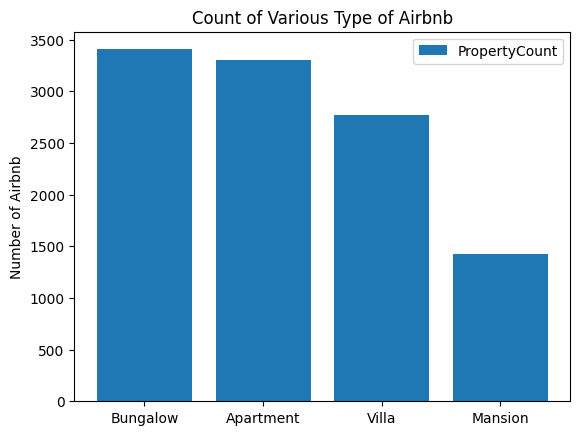

In [81]:
# 1–2 Guests: Studio or Apartment
# 3–4 Guests: Cabin or Bungalow
# 5–8 Guests: Villa or Cottage
# 9+ Guests: Mansion or Large House
from matplotlib import pyplot as plt
def type_of_property(n):
    if(n<=2): return 'Apartment'
    elif(n>=3 and n<=4): return 'Bungalow'
    elif(n>=5 and n<=8): return 'Villa'
    else: return 'Mansion'
propertyType=data['no_of_guest'].apply(type_of_property).value_counts().index
count_of_property=data['no_of_guest'].apply(type_of_property).value_counts().values
# print(propertyType,count_of_property)
plt.bar(propertyType,count_of_property,label='PropertyCount')
plt.title('Count of Various Type of Airbnb')
plt.ylabel('Number of Airbnb')
plt.legend()
plt.show()

### Average price distribution based on country

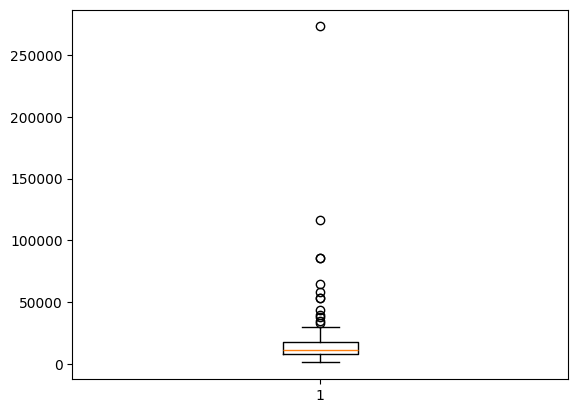

In [86]:
d=data.groupby(by='country')['price'].agg(['mean'])
plt.boxplot(d)
plt.show()

In [97]:
d=data.sort_values(by=['rating'],ascending=False)
d['country'].head(10)

7408         Greece
61         Thailand
60          Vietnam
6195         Greece
46            India
48           Turkey
33           Turkey
63      Philippines
49           Turkey
52      Philippines
Name: country, dtype: object

### Top 10 famous amenities and their distribution across properties

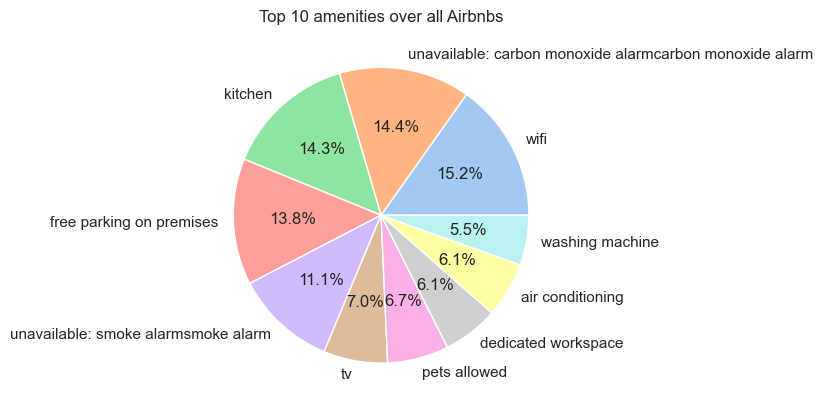

In [103]:
amenities_types=data['amenities'].apply(lambda y:y.lower().split(',')).explode().value_counts().head(10).index
values=data['amenities'].apply(lambda y:y.lower().split(',')).explode().value_counts().head(10).values
plt.pie(values,labels=amenities_types,autopct='%1.1f%%')
plt.title('Top 10 amenities over all Airbnbs')
plt.show()

### Finding relationship between number of beds and price of property

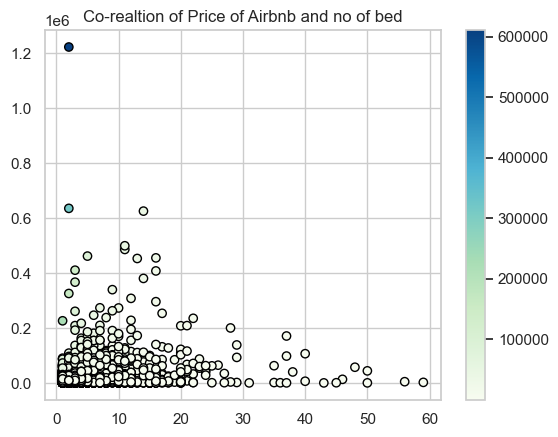

In [110]:
ratio=data['price']/data['no_of_bed']
plt.scatter(data['no_of_bed'],data['price'],edgecolors='black',linewidths=1,cmap='GnBu',c=ratio)
cbar=plt.colorbar()
cbar.label='price/no of bed ratio'
plt.title('Co-realtion of Price of Airbnb and no of bed')
plt.show()
# data.info()

In [114]:
count_of_property_covidguideline=0
for row in data['safety_rules'].apply(lambda y:y.lower().split()):
    for entry in row:
        if('covid' in entry):
            count_of_property_covidguideline+=1
            break
print((count_of_property_covidguideline/len(data))*100)
Every Property Host wants their guest to follow covid-19 guidelines

100.0


### HeatMap for numerical Distribution of features like price,review,ration

<Axes: >

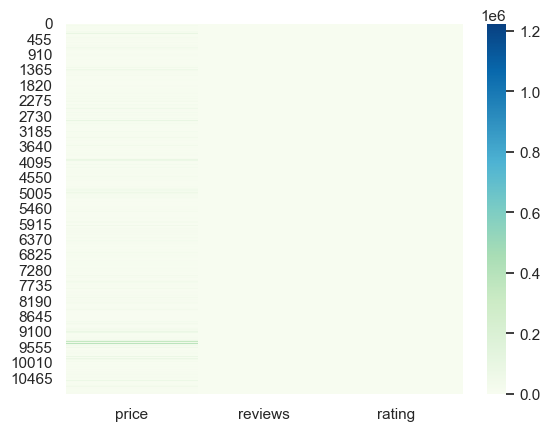

In [123]:
import seaborn as yf
yf.heatmap(data.loc[::,['price','reviews','rating']],cmap='GnBu')
# plt.show()
# data.loc[::,['price','reviews','rating']]

### Top 5 Properties with highest price to rating ratio

In [134]:
df=data[data['rating']!=0.0]
index=(df['price']/df['rating']).sort_values(ascending=False).head(5).index
df.loc[index,['name']]

,name
4250,Romantic hideaway in the middle of the Mols Mo...
9427,"NEW: LUXURY CHALET MERIBEL, 16 people"
4093,Sky Floor- Two bedroom Burj Khalifa View
9332,Kaggeholm Castle - Rent your own castle
9345,"Sea View,Pool, Padel Tennis, Tavern, Heli Pad"


### Distribution of Reviews for all Airbnb

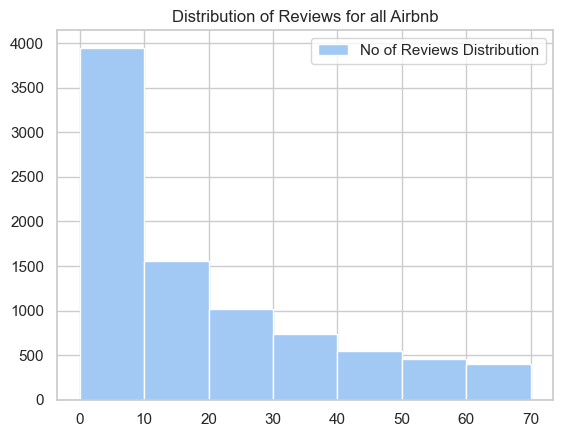

In [139]:
#There are more air bnb with 0 review and Further communication can be done with property host regarding ad and so on
# data['reviews']
plt.hist(data['reviews'],bins=[0,10,20,30,40,50,60,70],label='No of Reviews Distribution')
plt.legend()
plt.title('Distribution of Reviews for all Airbnb')
plt.show()

In [145]:
average price and no of beds for properties with wifi and without wifi
data[data['has_wifi']==True].loc[:,['price','no_of_bed']].mean
price        15079.531062
no_of_bed        3.127032
data[data['has_wifi']!=True].loc[:,['price','no_of_bed']].mean()
price        10458.401346
no_of_bed        2.921284

price        10458.401346
no_of_bed        2.921284
dtype: float64